In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
# mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H:%M:%S")
# df = pd.read_csv("file.csv", sep='\t', names=['date_column', 'other_column'], parse_dates=['date_column'], date_parser=mydateparser)

df_covid = pd.read_csv("./input/covid_19_clear.csv", parse_dates=['Date'], infer_datetime_format=True)
df_country_info = pd.read_csv("./input/country_info.csv")

In [46]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    10431 non-null  object        
 1   Date       10431 non-null  datetime64[ns]
 2   Confirmed  10431 non-null  int64         
 3   Deaths     10431 non-null  int64         
 4   Recovered  10431 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 407.6+ KB


In [47]:
df_covid

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
10426,Zimbabwe,2020-03-05,0,0,0
10427,Zimbabwe,2020-03-06,0,0,0
10428,Zimbabwe,2020-03-07,0,0,0
10429,Zimbabwe,2020-03-08,0,0,0


# Combinando os dados

In [48]:
covid_top_50 = df_covid[df_covid["Date"] == '2020-03-22'].sort_values(by=['Confirmed', 'Deaths', 'Recovered'], ascending=False).head(55).Country.values

In [49]:
coutries = df_country_info.Country.values

In [50]:
df_country_info

,Country,Age 0-9,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50-59,Age 60-69,Age 70-79,Age >80,# People,GDP,GDP per capta,Life expectancy,# Flight Passengers
0,Mexico,22245383,22356958,21623928,18636625,16343173,12397493,7946332,4023962,1400068,12697.3922,2.288306e+12,9946.157994,74.947,6.456964e+07
1,Slovakia,568394,542764,680528,860773,843980,714201,687712,380061,122175,540.0588,1.700908e+11,19897.153507,77.219,NaN
2,Sweden,1191245,1106232,1304961,1289302,1277210,1280608,1097278,967449,362698,987.6983,4.859173e+11,56935.188270,82.516,NaN
3,Croatia,392834,410760,480216,550013,555343,588949,560899,355380,165828,406.0222,9.677216e+10,15219.882785,78.197,2.093577e+06
4,Indonesia,47977486,46310084,43068836,41353654,37293402,28325635,16650777,7276648,1791671,27004.8193,3.106463e+12,4130.663276,71.282,1.151541e+08
5,Switzerland,875799,835663,1047321,1211148,1177086,1309842,953874,731996,307204,844.9933,5.051785e+11,76667.444040,83.473,2.885799e+07
6,Singapore,473440,525276,841606,898862,965359,946886,762636,260127,92128,576.6320,5.079963e+11,55235.512886,83.279,4.040152e+07
7,Qatar,268598,230385,719809,819308,462935,238779,74010,14279,2975,283.1078,3.132168e+11,65696.387132,79.981,2.917892e+07
8,Canada,3960088,3974074,5110382,5204909,4797691,5260069,4598419,2876627,1119713,3690.1972,1.633483e+12,51315.888975,82.210,8.938000e+07
9,India,236731829,252674336,238481457,212399683,165881490,125378954,84296275,37500685,9615035,136295.9744,9.317083e+12,1963.546321,69.165,1.640356e+08


In [51]:
for country in covid_top_50:
    if country not in coutries:
        print("Falta país: {}".format(country))

Falta país: Cruise Ship


In [52]:
df = pd.merge(df_covid, df_country_info, left_on='Country', right_on='Country', how='inner', suffixes=('', ''))


# Correlacionando os dados

In [53]:
df.corr()

,Confirmed,Deaths,Recovered,Age 0-9,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50-59,Age 60-69,Age 70-79,Age >80,# People,GDP,GDP per capta,Life expectancy,# Flight Passengers
Confirmed,1.000000,0.936582,0.863118,0.451096,0.424138,0.493840,0.580201,0.649966,0.703602,0.703108,0.687203,0.647470,0.577042,0.620467,-0.097259,-0.011762,0.451174
Deaths,0.936582,1.000000,0.825583,0.377340,0.354488,0.412922,0.486400,0.545746,0.590318,0.589316,0.577097,0.546131,0.483542,0.519907,-0.091183,-0.002463,0.361904
Recovered,0.863118,0.825583,1.000000,0.391633,0.367894,0.427096,0.500581,0.559029,0.603075,0.600951,0.582164,0.539032,0.496777,0.513896,-0.095063,-0.036695,0.369368
Age 0-9,0.451096,0.377340,0.391633,1.000000,0.997959,0.995979,0.976926,0.943165,0.898574,0.885121,0.859355,0.772729,0.977955,0.704662,-0.304924,-0.413416,0.467371
Age 10-19,0.424138,0.354488,0.367894,0.997959,1.000000,0.994616,0.970376,0.932508,0.884086,0.870966,0.846593,0.761240,0.971524,0.691657,-0.289024,-0.392297,0.459769
Age 20-29,0.493840,0.412922,0.427096,0.995979,0.994616,1.000000,0.989902,0.964356,0.927187,0.916035,0.892165,0.808986,0.990516,0.743055,-0.282152,-0.367918,0.507914
Age 30-39,0.580201,0.486400,0.500581,0.976926,0.970376,0.989902,1.000000,0.991469,0.969403,0.960632,0.936796,0.858035,0.999317,0.792000,-0.273885,-0.333658,0.549620
Age 40-49,0.649966,0.545746,0.559029,0.943165,0.932508,0.964356,0.991469,1.000000,0.992514,0.986162,0.965546,0.893137,0.991016,0.829134,-0.255817,-0.285980,0.588121
Age 50-59,0.703602,0.590318,0.603075,0.898574,0.884086,0.927187,0.969403,0.992514,1.000000,0.997483,0.980511,0.917524,0.969404,0.863566,-0.229259,-0.240202,0.633675
Age 60-69,0.703108,0.589316,0.600951,0.885121,0.870966,0.916035,0.960632,0.986162,0.997483,1.000000,0.990308,0.940096,0.961933,0.891161,-0.212166,-0.219051,0.672367


In [54]:
df_teste = df[['Country', 'Date', 'Confirmed', 'Recovered', 'Deaths', 'GDP', 'GDP per capta', 'Life expectancy', '# Flight Passengers']]

In [55]:
df_teste = df_teste[df_teste['Date'] == '2020-03-22']

In [56]:
df_teste['% pop abaixo 50'] = (df['Age 0-9'] + df['Age 10-19'] + df['Age 20-29'] + df['Age 30-39'] + df['Age 40-49'])
df_teste['% pop acima 50'] = (df['Age 50-59'] + df['Age 60-69'] + df['Age 70-79'] + df['Age >80'])
df_teste['% pop acima 60'] = (df['Age 60-69'] + df['Age 70-79'] + df['Age >80'])
df_teste['% pop acima 70'] = (df['Age 70-79'] + df['Age >80'])
df_teste['% pop acima 80'] = (df['Age >80'])

In [57]:
df_teste

,Country,Date,Confirmed,Recovered,Deaths,GDP,GDP per capta,Life expectancy,# Flight Passengers,% pop abaixo 50,% pop acima 50,% pop acima 60,% pop acima 70,% pop acima 80
53,Australia,2020-03-22,1314,88,7,1.134098e+12,55925.931817,83.122,7.566765e+07,16706081,8176329,5082676,2477659,709000
114,Austria,2020-03-22,3244,9,16,4.092673e+11,49129.233665,81.340,1.293550e+07,5284637,3531361,2128417,1128001,338138
175,Bahrain,2020-03-22,332,149,2,6.587424e+10,22111.477237,77.032,5.877003e+06,1420290,219619,82573,21305,4399
236,Belgium,2020-03-22,3401,263,75,4.977980e+11,46078.929087,81.305,1.363949e+07,7022261,4303147,2701256,1353560,444835
297,Brazil,2020-03-22,1593,2,25,2.991791e+12,10888.982385,75.456,1.021100e+08,158341756,51590519,27563911,11271726,2870636
358,Canada,2020-03-22,1465,10,21,1.633483e+12,51315.888975,82.210,8.938000e+07,23047144,13854828,8594759,3996340,1119713
419,Chile,2020-03-22,632,8,1,4.284072e+11,15059.530141,79.909,1.951718e+07,13412377,5380570,3051985,1314639,364300
480,China,2020-03-22,81397,72362,3265,2.253685e+13,7329.089299,76.470,6.114398e+08,977698106,448714941,234091129,85670538,18775767
541,Croatia,2020-03-22,254,5,1,9.677216e+10,15219.882785,78.197,2.093577e+06,2389166,1671056,1082107,521208,165828
602,Czech Republic,2020-03-22,1120,6,1,3.552755e+11,22779.291899,79.058,5.727200e+06,6583496,3961200,2628073,1283185,295858


In [58]:
df_teste.corr()

,Confirmed,Recovered,Deaths,GDP,GDP per capta,Life expectancy,# Flight Passengers,% pop abaixo 50,% pop acima 50,% pop acima 60,% pop acima 70,% pop acima 80
Confirmed,1.000000,0.775543,0.872323,0.719106,-0.000636,0.144672,0.595095,0.452978,0.655863,0.669398,0.689251,0.711275
Recovered,0.775543,1.000000,0.565715,0.713072,-0.136243,-0.032184,0.505035,0.619950,0.826266,0.818862,0.794972,0.749300
Deaths,0.872323,0.565715,1.000000,0.402362,-0.049120,0.139143,0.258850,0.278257,0.408354,0.414470,0.427902,0.444572
GDP,0.719106,0.713072,0.402362,1.000000,-0.098386,-0.120958,0.919331,0.758212,0.890221,0.910745,0.933894,0.946310
GDP per capta,-0.000636,-0.136243,-0.049120,-0.098386,1.000000,0.684765,0.083026,-0.284161,-0.212461,-0.196309,-0.167603,-0.127979
Life expectancy,0.144672,-0.032184,0.139143,-0.120958,0.684765,1.000000,-0.002627,-0.363062,-0.217819,-0.196571,-0.156750,-0.099464
# Flight Passengers,0.595095,0.505035,0.258850,0.919331,0.083026,-0.002627,1.000000,0.518515,0.669590,0.699436,0.737383,0.773169
% pop abaixo 50,0.452978,0.619950,0.278257,0.758212,-0.284161,-0.363062,0.518515,1.000000,0.933197,0.920858,0.892708,0.825625
% pop acima 50,0.655863,0.826266,0.408354,0.890221,-0.212461,-0.217819,0.669590,0.933197,1.000000,0.998013,0.984431,0.942347
% pop acima 60,0.669398,0.818862,0.414470,0.910745,-0.196309,-0.196571,0.699436,0.920858,0.998013,1.000000,0.993288,0.960970


# Visualizações dos dados mundiais

### Status 22/03/2020

In [59]:
covid_today = df_covid[df_covid["Date"] == '2020-03-22']

In [60]:
print("Total number of confirmed cases:", covid_today.sum()['Confirmed'])
print("Total number of deaths:", covid_today.sum()['Deaths'])
print("Total number of recovered cases:", covid_today.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid_today.sum()['Deaths'] / covid_today.sum()['Confirmed']))

Total number of confirmed cases: 335955
Total number of deaths: 14632
Total number of recovered cases: 97704
% of death: 4.355%


In [61]:
covid_per_date = df_covid.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

In [62]:
covid_per_date.sort_values(by='Confirmed', inplace=True)

[Text(0, 0.5, '# of Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'COVID-19 in the World')]

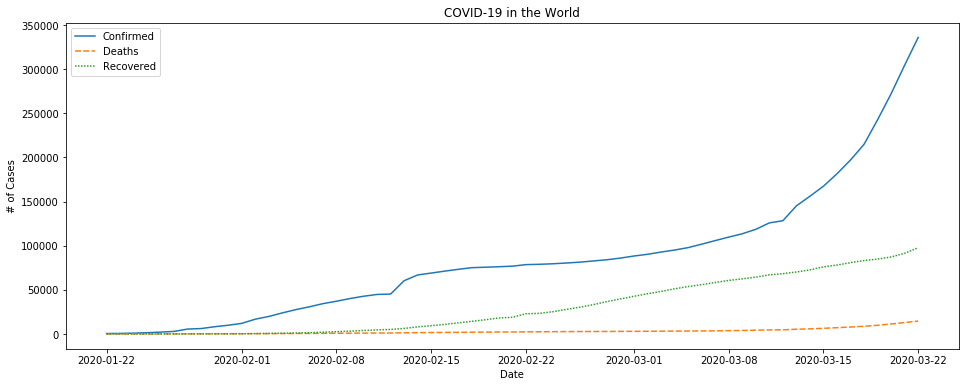

In [63]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=covid_per_date, sort=False)
ax.set(xlabel='Date', ylabel='# of Cases', title='COVID-19 in the World')

# Visualizações dos dados do Brasil


### Status 22/03/2020

In [64]:
covid_br_today = covid_today[covid_today["Country"] == 'Brazil']

In [65]:
print("Total number of confirmed cases:", covid_br_today.sum()['Confirmed'])
print("Total number of deaths:", covid_br_today.sum()['Deaths'])
print("Total number of recovered cases:", covid_br_today.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid_br_today.sum()['Deaths'] / covid_br_today.sum()['Confirmed']))

Total number of confirmed cases: 1593
Total number of deaths: 25
Total number of recovered cases: 2
% of death: 1.569%


In [66]:
covid_br_per_date = df_covid[df_covid['Country'] == 'Brazil']
covid_br_per_date = covid_br_per_date.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

In [67]:
covid_br_per_date.sort_values(by='Date', inplace=True)

[Text(0, 0.5, '# of Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'COVID-19 in Brazil')]

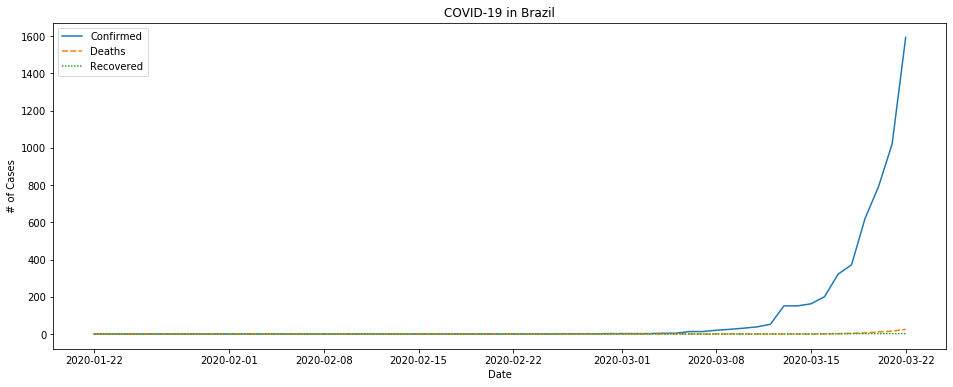

In [68]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=covid_br_per_date, sort=False)
ax.set(xlabel='Date', ylabel='# of Cases', title='COVID-19 in Brazil')

# Brasil x TOP 3

### Encontrado os top 3 países com mais casos 

In [89]:
top_countries = list(df[df['Date'] == '2020-03-22'].sort_values(['Confirmed'], ascending=False)[0:3].Country.values)
top_countries.append('Brazil')

In [90]:
df_top_3 = df[df.Country.isin(top_countries)][['Country', 'Date', 'Confirmed']]
df_top_3

,Country,Date,Confirmed
244,Brazil,2020-01-22,0
245,Brazil,2020-01-23,0
246,Brazil,2020-01-24,0
247,Brazil,2020-01-25,0
248,Brazil,2020-01-26,0
...,...,...,...
3350,United States,2020-03-05,217
3351,United States,2020-03-06,262
3352,United States,2020-03-07,402
3353,United States,2020-03-08,518


[Text(0, 0.5, '# of Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'COVID-19 in Brazil')]

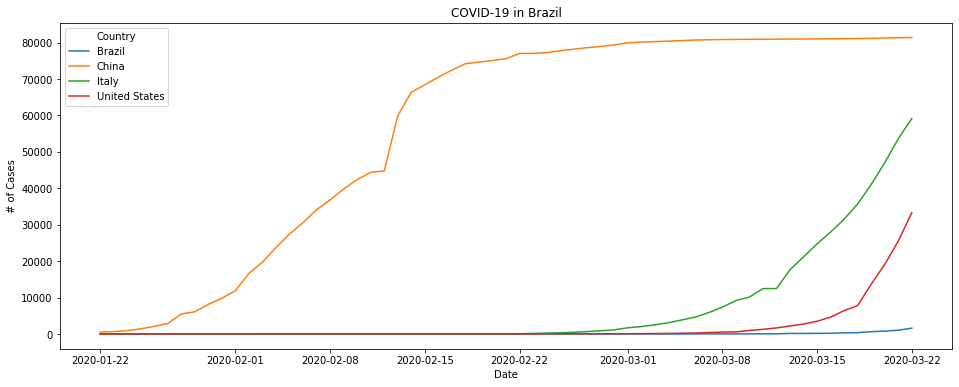

In [95]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x='Date', y='Confirmed', hue="Country", data=df_top_3, sort=True)
ax.set(xlabel='Date', ylabel='# of Cases', title='COVID-19 in Brazil')

In [149]:
df_top_3 = df_top_3[df_top_3['Confirmed'] != 0]

In [159]:
df_top_3.loc[df_top_3['Country'] == 'Brazil', '# Days'] = (df_top_3['Date'] - df_top_3[df_top_3['Country'] == 'Brazil'].Date.min())
df_top_3.loc[df_top_3['Country'] == 'Italy', '# Days'] = (df_top_3['Date'] - df_top_3[df_top_3['Country'] == 'Italy'].Date.min())
df_top_3.loc[df_top_3['Country'] == 'China', '# Days'] = (df_top_3['Date'] - df_top_3[df_top_3['Country'] == 'China'].Date.min())
df_top_3.loc[df_top_3['Country'] == 'United States', '# Days'] = (df_top_3['Date'] - df_top_3[df_top_3['Country'] == 'United States'].Date.min())


In [160]:
df_top_3['# Days'] = df_top_3['# Days'] / 86400000000000

In [161]:
df_top_3

,Country,Date,Confirmed,# Days
272,Brazil,2020-02-26,1,0
273,Brazil,2020-02-27,1,1
274,Brazil,2020-02-28,1,2
275,Brazil,2020-02-29,2,3
283,Brazil,2020-03-01,2,4
...,...,...,...,...
3350,United States,2020-03-05,217,43
3351,United States,2020-03-06,262,44
3352,United States,2020-03-07,402,45
3353,United States,2020-03-08,518,46


[Text(0, 0.5, '# of Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'COVID-19 in Brazil')]

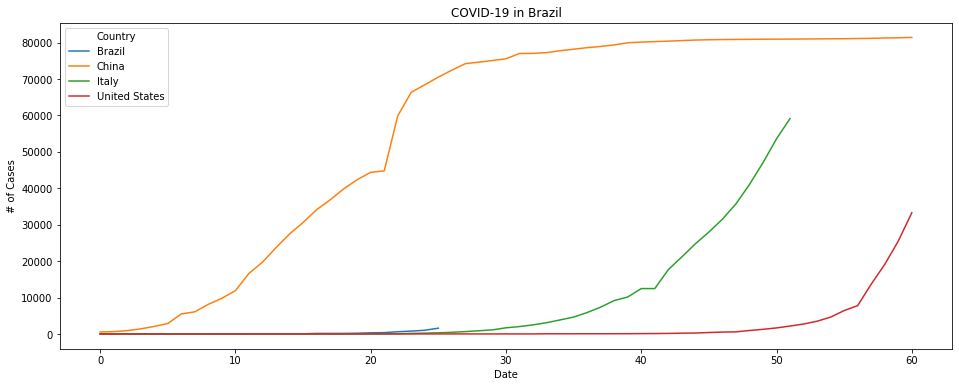

In [168]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x='# Days', y='Confirmed', hue="Country", data=df_top_3, sort=True)
ax.set(xlabel='Date', ylabel='# of Cases', title='COVID-19 in Brazil')


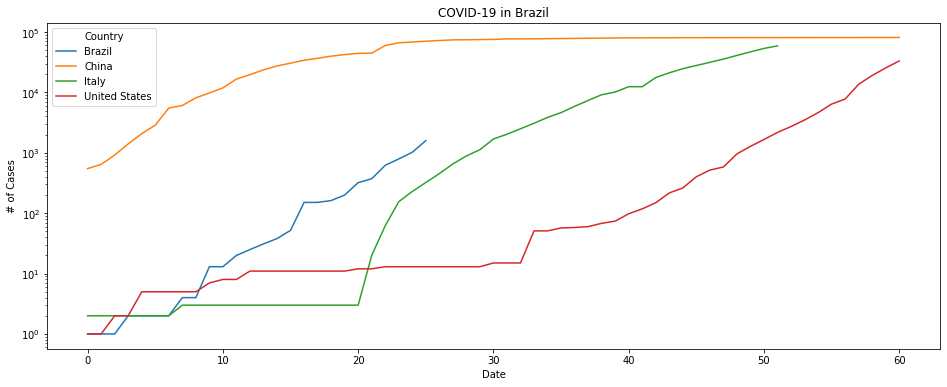

In [169]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x='# Days', y='Confirmed', hue="Country", data=df_top_3, sort=True)
ax.set(xlabel='Date', ylabel='# of Cases', title='COVID-19 in Brazil')
ax.set_yscale('log')